# Final Project - Data-Driven-Insight on Body signal of smoking

Course: Analysis for Data Science, Data-Science, Cornerstone  
Instructor: Derrick Park  
Publisher: Yoji Utsumi  
Last update: Sep 26, 2024  

## About dataset

[Body signal of smoking](https://www.kaggle.com/datasets/kukuroo3/body-signal-of-smoking)
- Licence: CC0: Public Domain
- Number of records: 55,692

## Data reading & cleaning

Before starting analysis, I have to clean data.

In [21]:
import pandas as pd
import seaborn as sns
from scipy import stats
from matplotlib import pyplot as plt

data = pd.read_csv('smoking.csv')
data.dropna(inplace=True)

Just in order to become easy to look into, reindex the colums.

In [22]:
data = data[['ID', 'smoking'] + [col for col in data.columns if col not in  ['ID', 'smoking']]]

Tartar is expressed as Y or N. Number(0 or 1) is better to calculate statistic.

In [23]:
data['tartar'] = data['tartar'].replace({'Y': 1, 'N': 0}).infer_objects(copy=False)

C:\Users\UtsumiYoji\AppData\Local\Temp\ipykernel_20880\2354248984.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['tartar'] = data['tartar'].replace({'Y': 1, 'N': 0}).infer_objects(copy=False)


## Exploratory Data Analysis (EDA)

### Basic statistics

In order to figure out about dataset roughly, display first 5 rows and basic statistics such as count, mean, and std.

In [24]:
data.head()

,ID,smoking,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar
0,0,0,F,40,155,60,81.3,1.2,1.0,1.0,...,126.0,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,1
1,1,0,F,40,160,60,81.0,0.8,0.6,1.0,...,127.0,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,1
2,2,1,M,55,170,60,80.0,0.8,0.8,1.0,...,151.0,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,0
3,3,0,M,40,165,70,88.0,1.5,1.5,1.0,...,226.0,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,1
4,4,0,F,40,155,60,86.0,1.0,1.0,1.0,...,107.0,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,0


In [25]:
data.describe()

,ID,smoking,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar
count,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,...,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000
mean,27845.500000,0.367288,44.182917,164.649321,65.864936,82.046418,1.012623,1.007443,1.025587,1.026144,...,57.290347,114.964501,14.622592,1.087212,0.885738,26.182935,27.036037,39.952201,0.213334,0.555556
std,16077.039933,0.482070,12.071418,9.194597,12.820306,9.274223,0.486873,0.485964,0.157902,0.159564,...,14.738963,40.926476,1.564498,0.404882,0.221524,19.355460,30.947853,50.290539,0.409665,0.496908
min,0.000000,0.000000,20.000000,130.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,...,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,1.000000,0.000000,0.000000
25%,13922.750000,0.000000,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,...,47.000000,92.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000,0.000000
50%,27845.500000,0.000000,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,...,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,25.000000,0.000000,1.000000
75%,41768.250000,1.000000,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,...,66.000000,136.000000,15.800000,1.000000,1.000000,28.000000,31.000000,43.000000,0.000000,1.000000
max,55691.000000,1.000000,85.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.000000,...,618.000000,1860.000000,21.100000,6.000000,11.600000,1311.000000,2914.000000,999.000000,1.000000,1.000000


Look into some statistics and group by smoker

In [26]:
data.groupby('smoking').agg({
    'weight(kg)': ['mean'],
    'Cholesterol' : ['mean'],
    'hemoglobin' : ['mean'],
    'dental caries': ['sum'],
    'tartar': ['sum'],
    }
    ).reset_index()

,smoking,weight(kg),Cholesterol,hemoglobin,dental caries,tartar
,,mean,mean,mean,sum,sum
0,0,62.907455,197.690921,14.144990,6375,18260
1,1,70.959668,195.541384,15.445339,5506,12680


### Visualizations

#### Smoker tend to be fat?

If smokers have more weight than non-smoker, it means smokers are also expected to have bad food habit. Not only weight, I can calculate BMI using with height and weight.

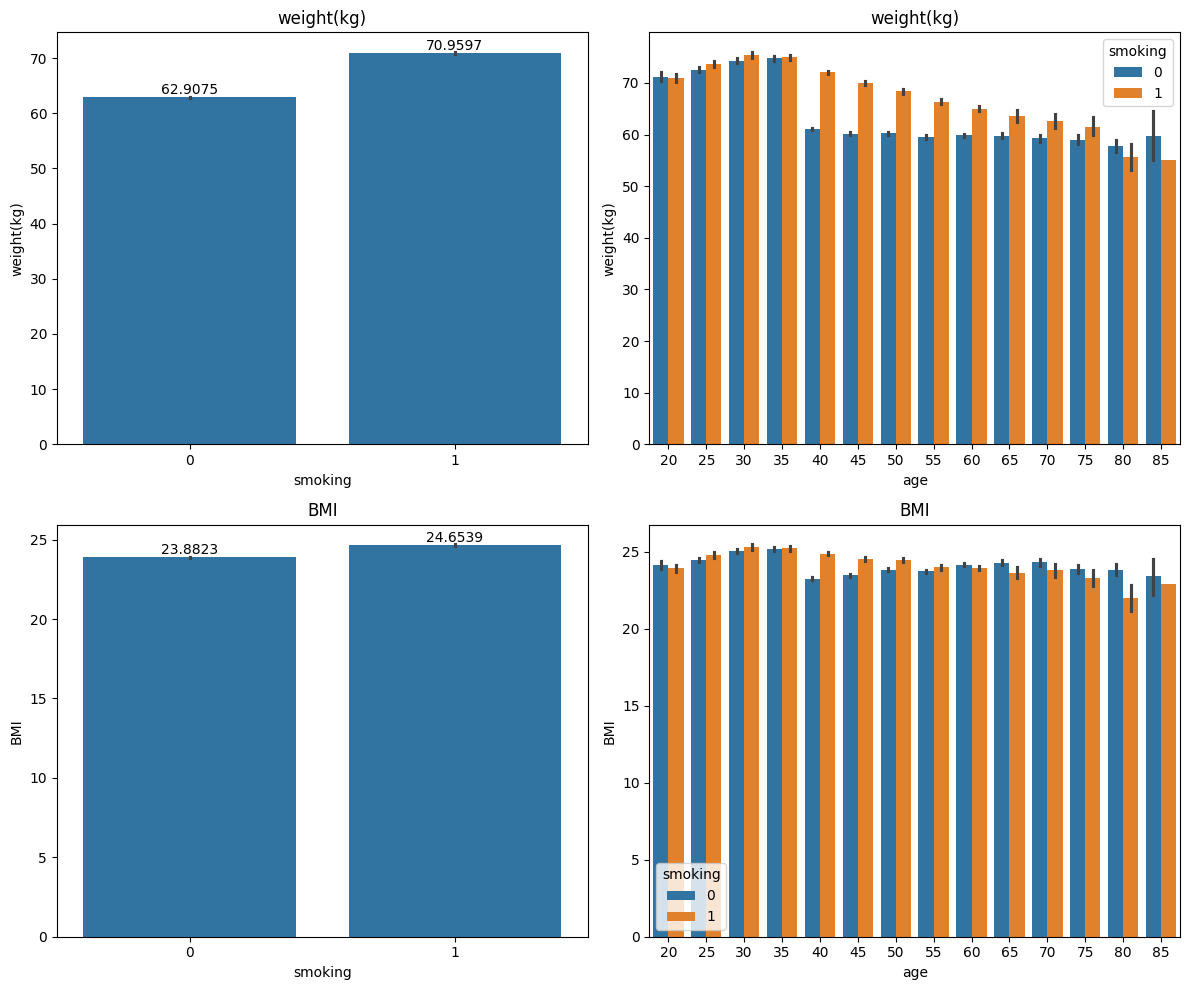

In [27]:
data['BMI'] = data['weight(kg)'] / ((data['height(cm)'] / 100 ) ** 2)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, indicater in enumerate(('weight(kg)', 'BMI')):
    ax1 = sns.barplot(x='smoking', y=indicater, data=data, ax=axes[i, 0])
    ax1.set_title(indicater)

    for container in ax1.containers:
        ax1.bar_label(container, fontsize=10)

    ax2 = sns.barplot(x='age', y=indicater, hue='smoking', data=data, ax=axes[i, 1])
    ax2.set_title(indicater)

plt.tight_layout()
plt.show()

There is an 8kg difference between non-smokers and smokers. According to the second barplot, this trend (smokers tend to be fat) appears especially after the age of 40.  
On the other hand, BMI-wise, there is no big difference. I can say that some smokers tend to have higher BMI than non-smokers, values is within normal range (18.5 to 20.0) though.

#### Comapre health indicater

Keep analyzing on health indicater. Before starting to analyze, here is a description of these indicater.

- Systolic (Systolic Blood Pressure)
   - Meaning: The pressure in your arteries when the heart pumps blood. Commonly referred to as "upper blood pressure."
   - Normal Range: Ideally, below 120 mmHg.
- Relaxation (Diastolic Blood Pressure)
   - Meaning: The pressure in your arteries when the heart is relaxed and filling with blood. Known as "lower blood pressure."
   - Normal Range: Below 80 mmHg is considered optimal.
- Fasting Blood Sugar
   - Meaning: Blood sugar levels measured after fasting. Used to assess diabetes risk and blood sugar control.
   - Normal Range: 70–99 mg/dL is normal; above 100 mg/dL may indicate high blood sugar.
- Cholesterol: Total
   - Meaning: The total amount of cholesterol in the blood. Used to assess cardiovascular disease risk.
   - Normal Range: Below 200 mg/dL is ideal.
- Triglyceride
   - Meaning: A type of fat found in the blood, used as an energy source. High levels can increase the risk of heart disease.
   - Normal Range: Less than 150 mg/dL is normal.
- HDL: Cholesterol Type
   - Meaning: Known as "good cholesterol," it helps transport cholesterol from the arteries back to the liver.
   - Normal Range: 40 mg/dL or higher is considered good; higher levels are better.
- LDL: Cholesterol Type
   - Meaning: Known as "bad cholesterol," it can lead to cholesterol buildup in arteries, increasing cardiovascular disease risk.
   - Normal Range: Less than 100 mg/dL is ideal.
- Hemoglobin
   - Meaning: A protein in red blood cells that carries oxygen. It is used to assess anemia and the blood's oxygen-carrying capacity.
   -  Normal Range:
      -  Men: 13.5–17.5 g/dL
      - Women: 12.0–16.0 g/dL
- Urine Protein
   - Meaning: Measures the amount of protein in urine. Used to assess kidney function. Normally, very little protein is found in urine.
   -  Normal Range: Negative or trace amounts (±) are normal.
-  Serum Creatinine
   - Meaning: A measure of kidney function. Creatinine is a byproduct of muscle metabolism and is filtered by the kidneys.
   - Normal Range:
      - Men: 0.7–1.3 mg/dL
      - Women: 0.5–1.1 mg/dL
-  AST: Glutamic Oxaloacetic Transaminase (AST)
   - Meaning: An enzyme that increases in the blood when liver or heart cells are damaged. It is used to assess liver function and heart disease.
   - Normal Range: 10–40 IU/L.
-  ALT: Glutamic Pyruvic Transaminase (ALT)
   - Meaning: An enzyme used to assess liver health. It increases when liver cells are damaged.
   - Normal Range: 7–56 IU/L.
-  γ-GTP (Gamma-GTP)
   - Meaning: An enzyme used to evaluate liver and bile duct health. It may increase due to alcohol consumption or medication use.
   - Normal Range:
      - Men: 10–50 IU/L
      - Women: 7–32 IU/L

The bar graph can have a red line or a blue line. Red line means it is abnormal if the value exceeds the red line. Blue line is the opposite.

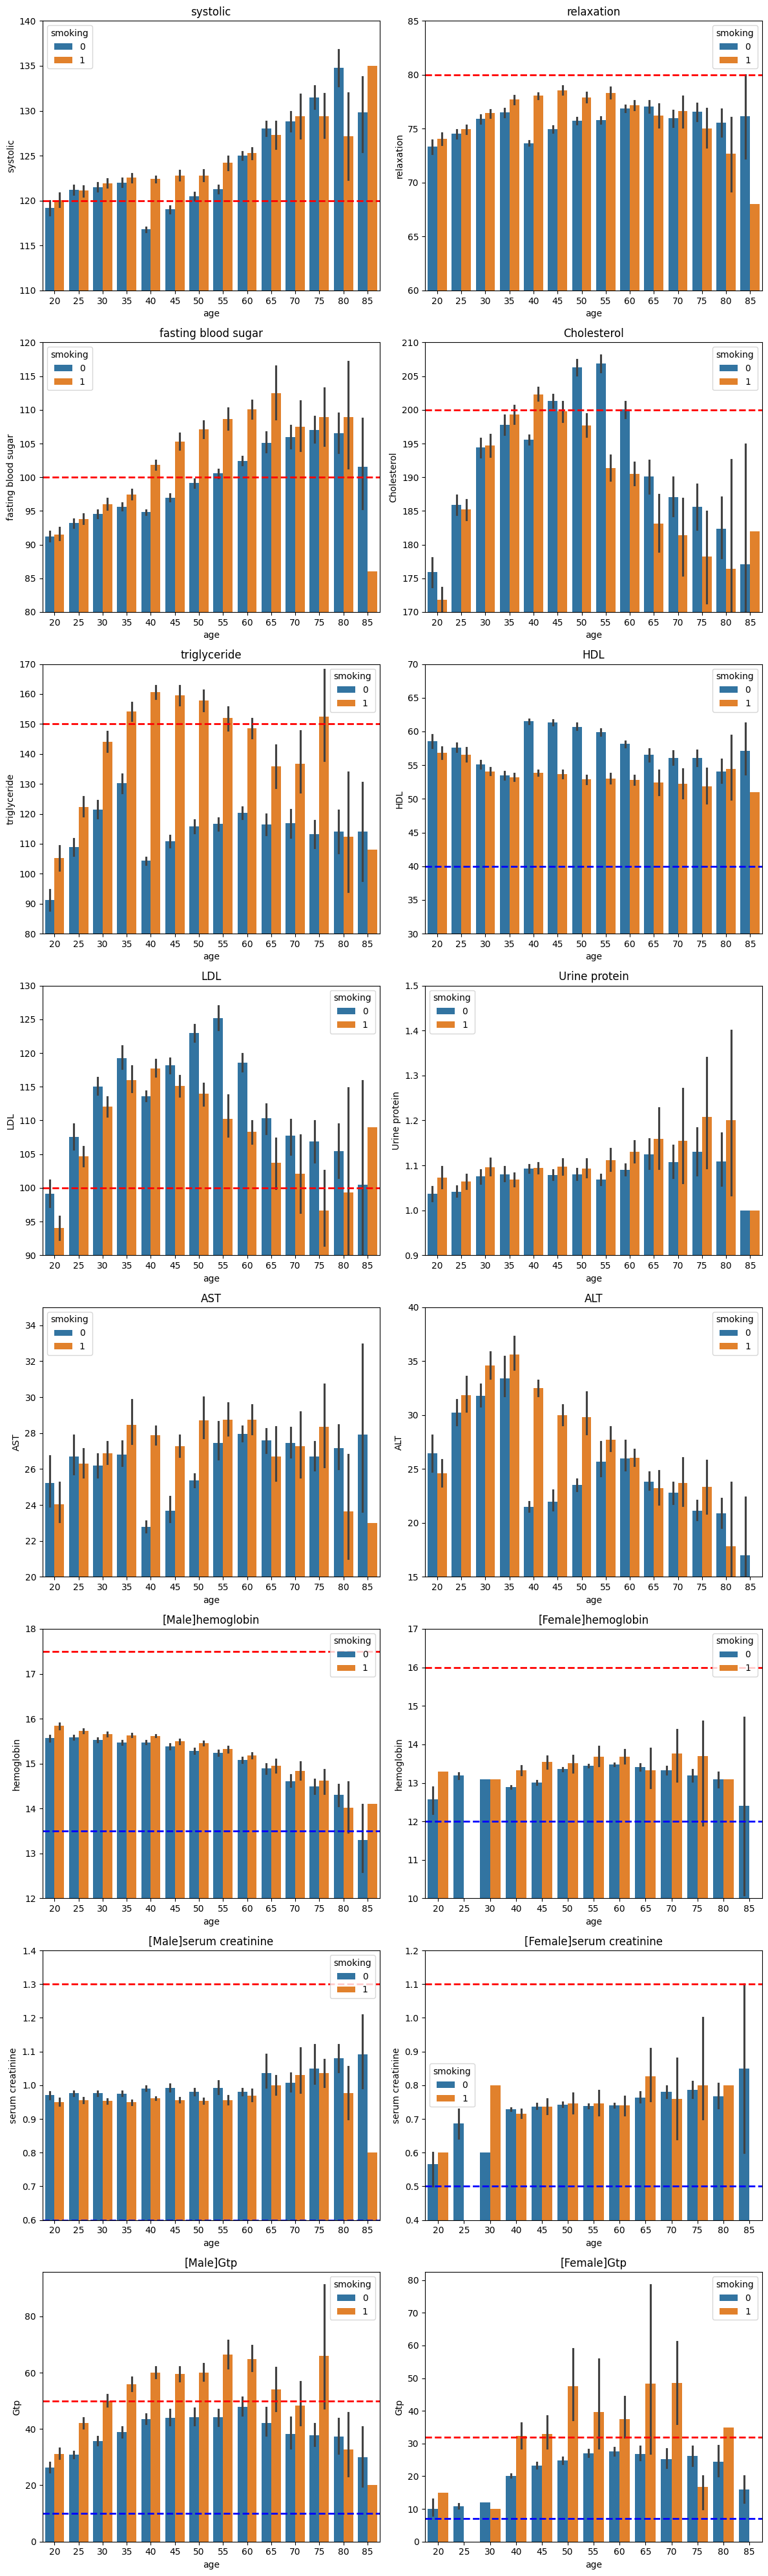

In [28]:
settings = {
    'systolic': {'ylim': (110, 140), 'red': 120},
    'relaxation': {'ylim': (60, 85), 'red': 80},
    'fasting blood sugar': {'ylim': (80, 120), 'red': 100},
    'Cholesterol': {'ylim': (170, 210), 'red': 200},
    'triglyceride': {'ylim': (80, 170), 'red': 150},
    'HDL': {'ylim': (30, 70), 'blue': 40},
    'LDL': {'ylim': (90, 130), 'red': 100},
    'Urine protein': {'ylim': (0.9, 1.5)},
    'AST': {'ylim': (20, 35)},
    'ALT': {'ylim': (15, 40)},
    '[Male]hemoglobin': {'ylim': (12, 18), 'red': 17.5, 'blue': 13.5, 'gender': 'M'},
    '[Female]hemoglobin': {'ylim': (10, 17), 'red': 16, 'blue': 12, 'gender': 'F'},
    '[Male]serum creatinine': {'ylim': (0.6, 1.4), 'red': 1.3, 'blue': 0.6, 'gender': 'M'},
    '[Female]serum creatinine': {'ylim': (0.4, 1.2), 'red': 1.1, 'blue': 0.5, 'gender': 'F'},
    '[Male]Gtp': {'red': 50, 'blue': 10, 'gender': 'M'},
    '[Female]Gtp': {'red': 32, 'blue': 7, 'gender': 'F'},
}

fig, axes = plt.subplots(8, 2, figsize=(12, 40))

for i, (title, setting) in enumerate(settings.items()):
    if setting.get('gender'):
        temp_data = data[data['gender'] == setting['gender']]
    else:
        temp_data = data

    y = title.replace('[Male]', '').replace('[Female]', '')
    ax = sns.barplot(x='age', y=y, hue='smoking', data=temp_data, ax=axes[i//2, i%2])
    ax.set_title(title)
    
    if setting.get('ylim'):
        ax.set_ylim(setting['ylim'])
    
    if setting.get('red'):
        ax.axhline(setting['red'], color='red', linestyle='--', linewidth=2)
    
    if setting.get('blue'):
        ax.axhline(setting['blue'], color='blue', linestyle='--', linewidth=2)

plt.tight_layout()
plt.show()


Most of the indicators explain smokers have poor values when compared with non-smokers. Only HDL, LDL, and serum creatinine are fair or better than non-smoker.

## Hypothesis Testing

### Hypothesis: Smokers have a higher average BMI than non-smokers.

#### Checking distribution

Before starting the test, make sure that the data follow a normal distribution.

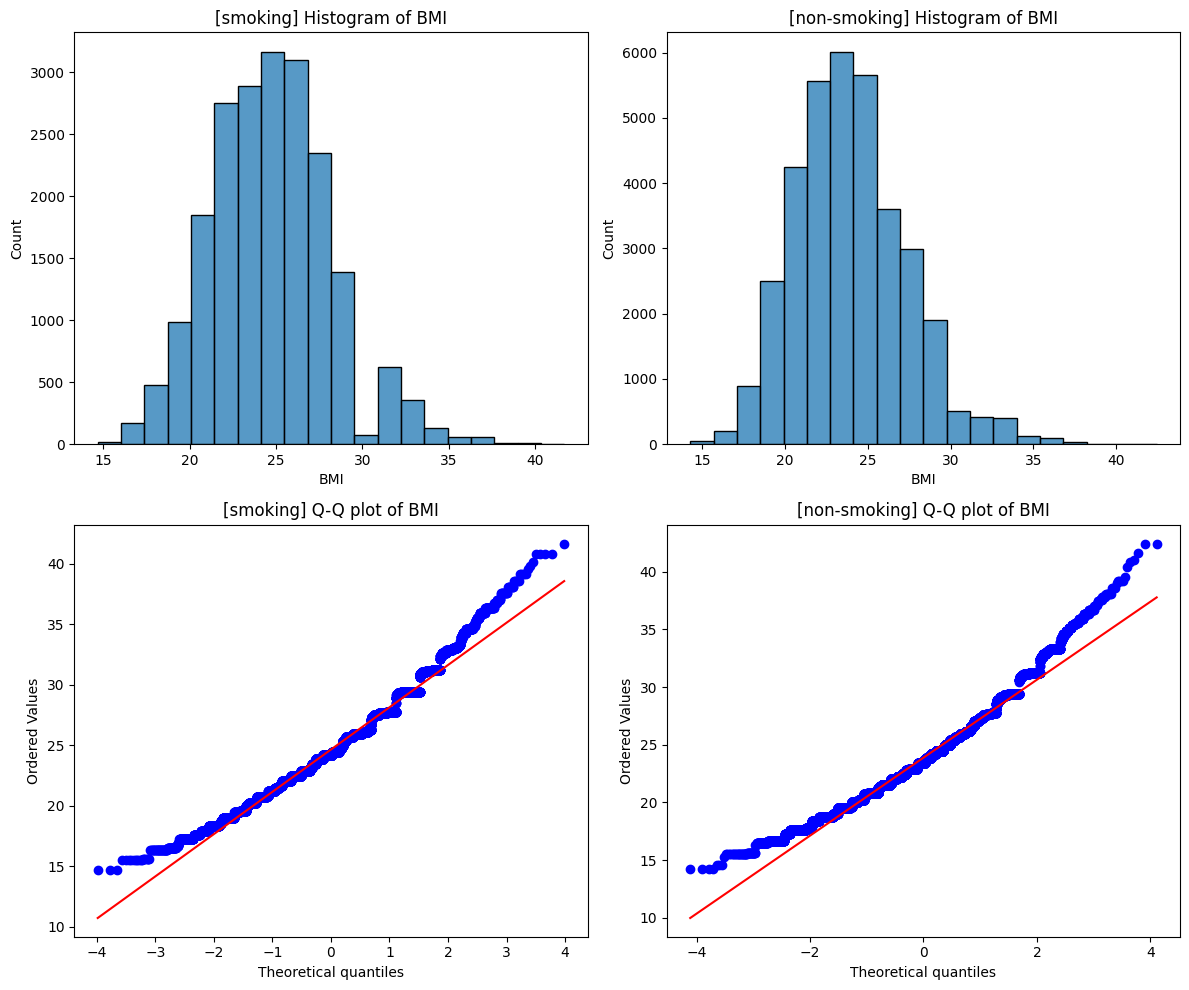

In [35]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.histplot(x='BMI', data=data[data['smoking'] == 1], bins=20, ax=axes[0, 0])
sns.histplot(x='BMI', data=data[data['smoking'] == 0], bins=20, ax=axes[0, 1])
stats.probplot(data[data['smoking'] == 1]["BMI"], dist="norm", plot=axes[1, 0])
stats.probplot(data[data['smoking'] == 0]["BMI"], dist="norm", plot=axes[1, 1])

axes[0, 0].set_title('[smoking] Histogram of BMI')
axes[0, 1].set_title('[non-smoking] Histogram of BMI')
axes[1, 0].set_title('[smoking] Q-Q plot of BMI')
axes[1, 1].set_title('[non-smoking] Q-Q plot of BMI')

plt.tight_layout()
plt.show()

According to Q-Q plot and histogram, I can say both data are following normal distrbution so I can peform T-testing.

#### T-Testing

**Null Hypothesis**: There is not BMI diffrent between somker and non-smoker.  
**Alt Hypothesis**: BMI of smoker is higher than non-smoker.

In [40]:
# Perform T-test to compare BMI between smokers and non-smokers
smokers_bmi = data[data['smoking'] == 1]['BMI']
non_smokers_bmi = data[data['smoking'] == 0]['BMI']

t_stat, p_value = stats.ttest_ind(smokers_bmi, non_smokers_bmi, alternative='greater')

print(f"T-statistic: {t_stat}")
print(f"one-sided P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: Smokers have a higher average BMI than non-smokers.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in BMI between smokers and non-smokers.")

T-statistic: 25.388465546199665
one-sided P-value: 1.0824610193064387e-141
Reject the null hypothesis: Smokers have a higher average BMI than non-smokers.


### Hypothesis: Smokers tend to have tartar more than smoker.

#### Chi-Square Test

**Null Hypothesis:** There is no diffrent about tartar terend between smoker and non-smoker.  
**Alt Hypothesis:** There is diffrent about tartar trend between smoker and non-smoker.

In [39]:
# Perform Chi-Square Test to compare tartar trend between smokers and non-smokers
contingency_table = pd.crosstab(data['smoking'], data['tartar'])

chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_val}")

if p_val < 0.05:
    print("Reject the null hypothesis: There is a significant difference in tartar trend between smokers and non-smokers.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in tartar trend between smokers and non-smokers.")

Chi-Square Statistic: 541.6322219193373
P-value: 8.324287228632022e-120
Reject the null hypothesis: There is a significant difference in tartar trend between smokers and non-smokers.


## Correlation Testing

### Correlation: If the BMI is higher, the Fasting blood sugar is also higher

Generally speaking, people with a high BMI tend to have high blood sugar. I'd like to be sure that this correlation exists. And I also expect this tendency to be evident if peson is smoker.

In [47]:
# Perform Pearson Correlation Test between BMI and fasting blood sugar
temp_data = data[data['smoking'] == 1]
correlation, _ = stats.pearsonr(temp_data['BMI'], temp_data['fasting blood sugar'])
print(f"[Smoker]Pearson Correlation Coefficient: {correlation}")

temp_data = data[data['smoking'] == 0]
correlation, _ = stats.pearsonr(temp_data['BMI'], temp_data['fasting blood sugar'])
print(f"[Non-Smoker]Pearson Correlation Coefficient: {correlation}")

[Smoker]Pearson Correlation Coefficient: 0.1198668264890798
[Non-Smoker]Pearson Correlation Coefficient: 0.20043713826305837


According to the Pearson correlation test, there is only a weak association between BMI and fasting blood sugar. Surprisingly, non-smokers show a stronger correlation than smokers.

### Correlation: Eyesight is getting worse with ageing

Generally speaking, if people are older, eyesights score are also wrose. I'd like to be sure that this correlation exists. And I also expect this tendency to be evident if peson is smoker.

In [49]:
# Perform Pearson Correlation Test between age and eyesight
temp_data = data[data['smoking'] == 1]
correlation_left, _ = stats.pearsonr(temp_data['age'], temp_data['eyesight(left)'])
correlation_right, _ = stats.pearsonr(temp_data['age'], temp_data['eyesight(right)'])
print(f"[Smoker]Pearson Correlation Coefficient: {(correlation_left + correlation_right) / 2}")

temp_data = data[data['smoking'] == 0]
correlation_left, _ = stats.pearsonr(temp_data['age'], temp_data['eyesight(left)'])
correlation_right, _ = stats.pearsonr(temp_data['age'], temp_data['eyesight(right)'])
print(f"[Non-Smoker]Pearson Correlation Coefficient: {(correlation_left + correlation_right) / 2}")

[Smoker]Pearson Correlation Coefficient: -0.14275869630175356
[Non-Smoker]Pearson Correlation Coefficient: -0.20984925136233246


According to the Pearson correlation test, there is only a weak association between age and eyesight. Surprisingly, non-smokers show a stronger correlation than smokers.

## Interpretation & Real-World Application

### My expectation

I expected ...
- Smokers tend to have bad health indicator scores because smoking habit makes people unhealthy.
- Smoking causes secondary health damage such as tartar and BMI.
- As people get older, their ability becomes weaker. Smoking make it faster.

### Insight

My expectation was broadly correct.
- According to [Compare health indicater](#comapre-health-indicater), most of the smoker indicators show wrose values than the non-smoker ones.
- According to [Hypothesis Testing](#hypothesis-testing), smoking worsens BMI and tartar.
- According to [Correlation Testing](#correlation-testing),
  - There is a weak positive relation between BMI and blood sugar.
  - There is a weak negative relation between age and eyesight.
  - However, it doesn't say that smoking makes it faster.

### Recommendation

Do not smoke!

### Additional investigation

This dateset doesn't have how many cigarettes do they smoke and cigarette type(Now days, we have electronic cigarettes). I expect there is also stronge relation between amount of smoke and these indicater. If I could find these data, I would investigate again.